<a href="https://colab.research.google.com/github/ZhexunSu/JobRecommendation/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 273A Homework 3**

### Problem 1: Logistic Regression

In [1]:
import sys
sys.path.append("/content/drive/MyDrive/CS273A/HW3/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("/content/drive/MyDrive/CS273A/HW3/data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

Question 1

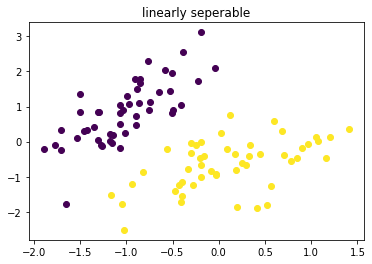

In [14]:
plt.title('linearly seperable')
ml.plotClassify2D(None, XA, YA)
plt.show()


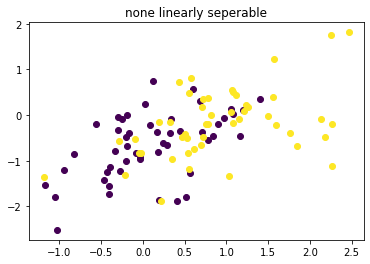

In [15]:
plt.title('none linearly seperable')
ml.plotClassify2D(None, XB, YB)
plt.show()

Question 2

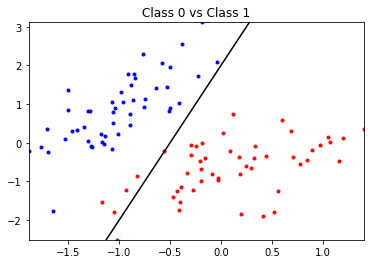

In [16]:
from logisticClassify2 import *

learnerA = logisticClassify2();
learnerA.classes = np.unique(YA)
wts = np.array([0.5,1,-0.25])
learnerA.theta = wts

plt.title("Class 0 vs Class 1")
learnerA.plotBoundary(XA,YA)
plt.show()


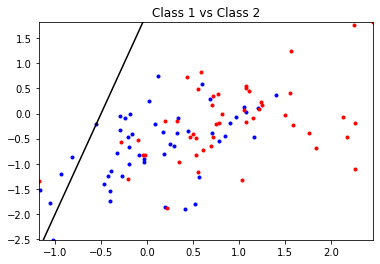

In [17]:
learnerB = logisticClassify2();
learnerB.classes = np.unique(YB)
wts = np.array([0.5,1,-0.25])
learnerB.theta = wts

plt.title("Class 1 vs Class 2")
learnerB.plotBoundary(XB,YB)
plt.show()

Question 3

In [12]:
def predict(self, X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    Z = self.theta[0] + X.dot(self.theta[1:])
    Yhat = np.asarray(self.classes)[(Z > 0).astype(int)]
    return Yhat

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)
learnerA.theta = np.array([0.5,1,-0.25])
print('Error rate is:', learnerA.err(XA, YA))

Error rate is: 0.050505050505050504


In [13]:
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = np.array([0.5,1,-0.25])
print('Error rate is:', learnerB.err(XB, YB))

Error rate is: 0.46464646464646464


Question 4

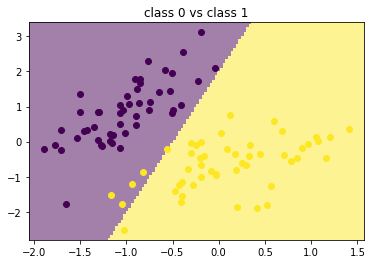

In [18]:
plt.title('class 0 vs class 1')
ml.plotClassify2D(learnerA,XA,YA)
plt.show()

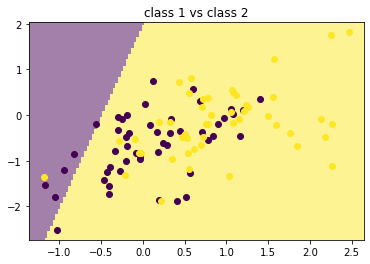

In [19]:
plt.title('class 1 vs class 2')
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

Question 5

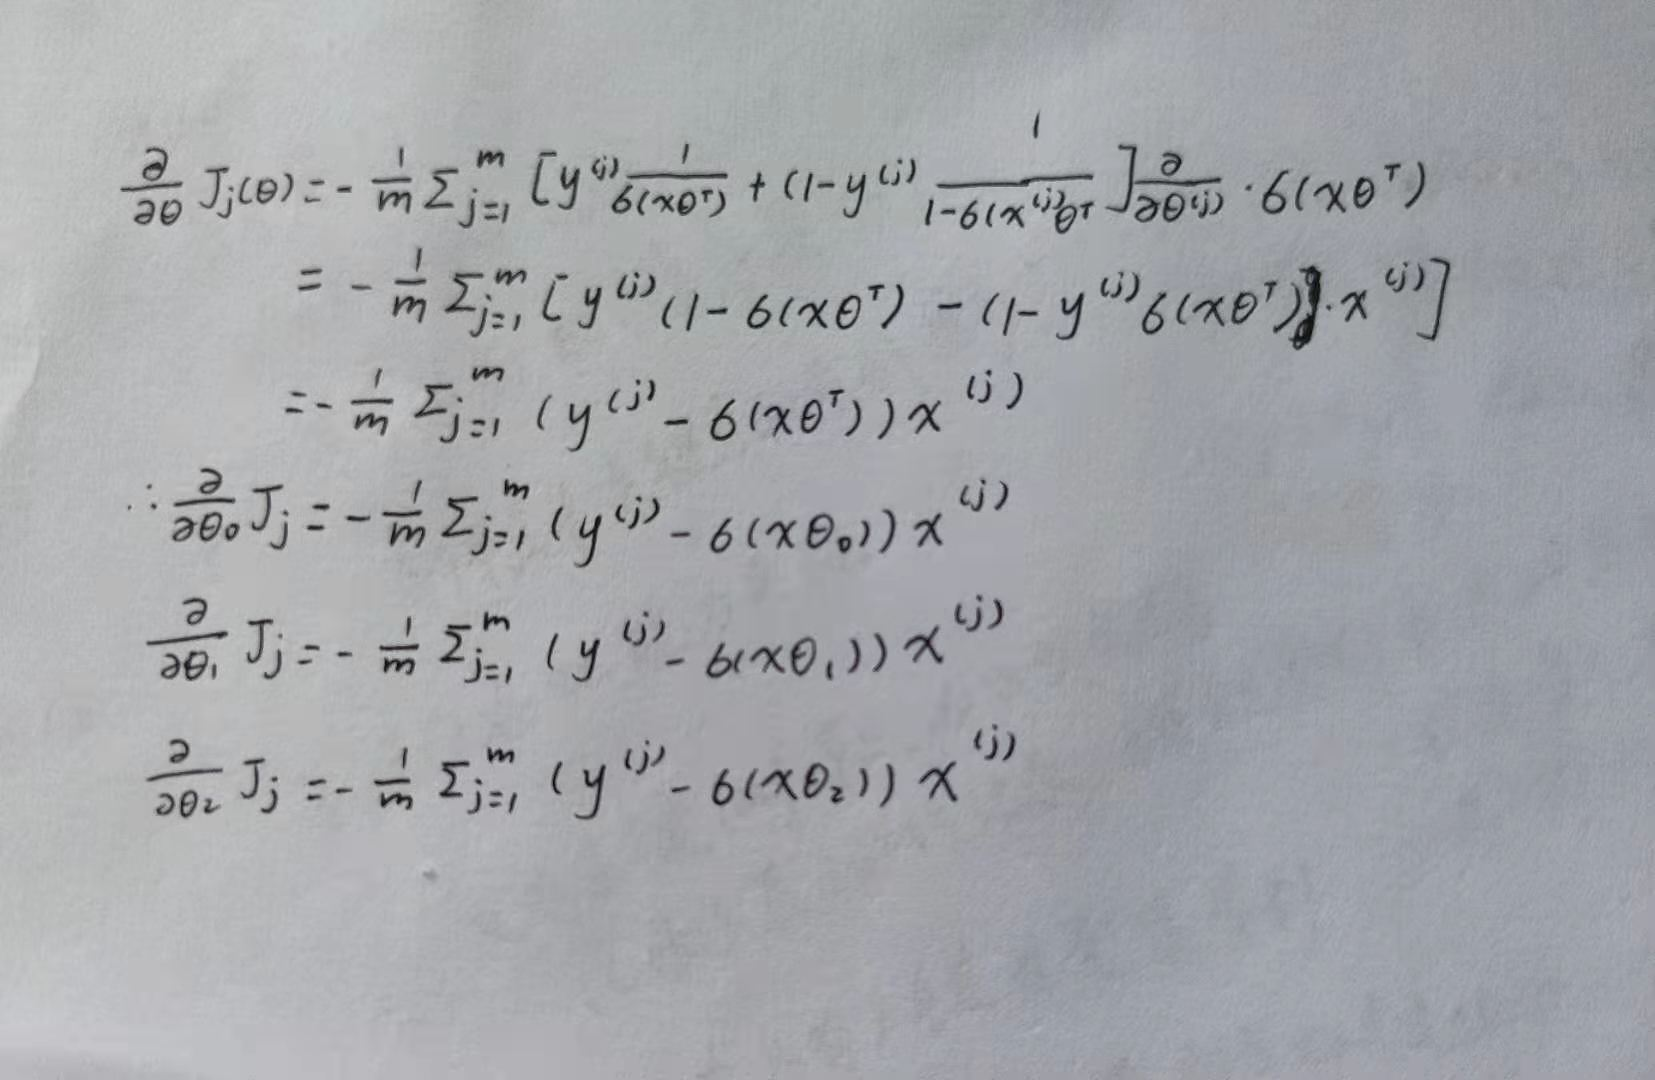

Question 6

In [ ]:
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:        self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = NotImplementedError;     # TODO: compute linear response r(x)
            gradi = NotImplementedError;     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jnll.append( NotImplementedError ) # TODO evaluate the current NLL loss
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2]<stopTol))


################################################################################
################################################################################
################################################################################

Question 7

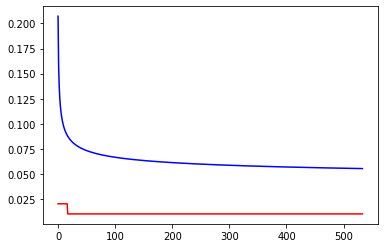

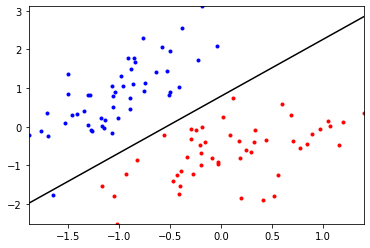

Training error is: 0.010101010101010102


In [ ]:
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.])
learnerA.train(XA,YA,initStep=1e-1, stopTol=1e-5, stopEpochs=2000)
print('Training error is:', learnerA.err(XA,YA))


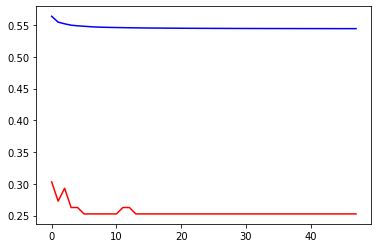

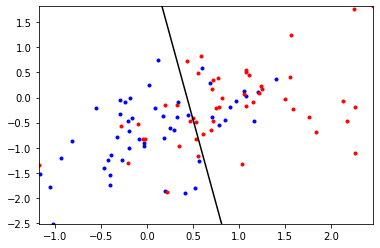

Training error is: 0.494949494949495


In [ ]:
learnerB = logisticClassify2()
learnerB.theta = np.array([0.,0.,0.])
learnerB.train(XB,YB,initStep=1e-1, stopTol=1e-5, stopEpochs=2000)
print('Training error is:', learnerA.err(XB,YB))


## **Problem 2: Shattering and VC Dimension**

Question 1

We can use figure a and b because there is only one point in a) and two points
in b). 

In c) and d), there are more than 2 points. 
In c), Y might be -1, +1, -1 or +1, -1, + 1. So the learner can not seperate them. Smilarly for d).

VC dimension is 2.


Question 2

This learner must go through (0, 0). Figure a, b can be seperated.
But for figure c, if point (2, 2) is -1, point (4, 8) is +1 and 
point(6, 4) is -1, the same as (2, 2). So the learner can not seperate them.
Similarly for d).

VC dimension is 2.

Question 3

This learner is a circle. Figure a, b, c can be seperated. But for figure d, 
if point (6, 4) is -1 and others are +1, the learner can not seperate.

VC dimension is 3.

Question 4

The two equations are parallel. So figure a, b, c and d can be classified properly.

VC dimension >= 4


# **Statement of Collaboration**

I did my homework independently.